# Boxplot of DE junctions

In [1]:
library(ggplot2)
suppressMessages(library(data.table))

In [2]:
ggplot_save <- function(p, fn, w=7, h=7){
    for(ext in c('.svg', '.png', '.pdf')){
        ggsave(p, filename=paste0(fn, ext), width=w, height=h)
    }
}

In [3]:
pheno_file = '/ceph/projects/v3_phase3_paper/inputs/phenotypes/_m/caudate_phenotypes.csv'
pheno = read.csv(pheno_file, row.names=1)
head(pheno, 2)

,BrNum,RNum,Region,RIN,Age,Sex,Race,Dx
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>
R12864,Br1303,R12864,Caudate,9.6,42.98,F,AA,Schizo
R12865,Br1320,R12865,Caudate,9.5,53.12,M,AA,Schizo


## Load residualized expression

In [4]:
res_file = '../../_m/junctions/residualized_expression.tsv'
resdf = fread(res_file, data.table=FALSE)
row.names(resdf) <- resdf$V1
resdf <- resdf[, -1]
resdf[1:2, 1:3]

Warning message in fread(res_file, data.table = FALSE):
“Detected 390 column names but the data has 391 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


,R12864,R12865,R12866
,<dbl>,<dbl>,<dbl>
chr1:600505-631888(+),0.3981144,0.6633527,-2.387622
chr1:600505-632511(+),0.5190361,0.2834374,-1.381316


In [5]:
resdf <- t(resdf)
resdf[1:2, 1:3]

,chr1:600505-631888(+),chr1:600505-632511(+),chr1:600584-632511(+)
R12864,0.3981144,0.5190361,0.2332564
R12865,0.6633527,0.2834374,0.7699391


In [6]:
juncs = read.delim('../../_m/junctions/diffExpr_interaction_full.txt')
juncs['Feature'] = row.names(juncs)
juncs = subset(juncs, adj.P.Val < 0.20, 
               select=c(Feature, ensemblID, Symbol, logFC, adj.P.Val))

sex = read.delim('../../_m/junctions/diffExpr_maleVfemale_full.txt')
sex['Feature'] = row.names(sex)
sex = subset(sex, Feature %in% juncs$Feature, select=c('Feature', 'adj.P.Val', 'logFC'))
colnames(sex) <- c('Feature', 'Sex FDR', 'Sex logFC')

sz = read.delim('../../_m/junctions/diffExpr_szVctl_full.txt')
sz['Feature'] = row.names(sz)
sz = subset(sz, Feature %in% juncs$Feature, select=c('Feature', 'adj.P.Val', 'logFC'))
colnames(sz) <- c('Feature', 'Diagnosis FDR', 'Diagnosis logFC')

juncs = merge(merge(juncs, sex, by='Feature'), sz, by='Feature')
juncs = juncs[order(juncs['adj.P.Val']), ]
juncs

,Feature,ensemblID,Symbol,logFC,adj.P.Val,Sex FDR,Sex logFC,Diagnosis FDR,Diagnosis logFC
,<chr>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,chr21:8402231-8402287(+),NA,NA,-4.853681,0.01151765,0.0010063041,2.993913,0.002682813,3.56517
1,chr21:8402231-8402287(-),NA,NA,-5.770147,0.01656117,0.0002834438,3.931118,0.002773264,4.38367


In [7]:
for(xx in seq_along(juncs$Symbol)){
    if(is.na(juncs$Symbol[xx])){
        juncs$New_ID[xx] = paste0(juncs$Feature[xx], '\nLog2FC: ', 
                                       sprintf("%.2f", juncs$logFC[xx]), ' FDR: ', 
                                       sprintf("%.2e", juncs$adj.P.Val[xx]))
        juncs$Sex_ID[xx] = paste0(juncs$Feature[xx], '\nLog2FC: ', 
                                       sprintf("%.2f", juncs[xx, 'Sex logFC']), ' FDR: ', 
                                       sprintf("%.2e", juncs[xx, 'Sex FDR']))
        juncs$SZ_ID[xx] = paste0(juncs$Feature[xx], '\nLog2FC: ', 
                                       sprintf("%.2f", juncs[xx, 'Diagnosis logFC']), ' FDR: ', 
                                       sprintf("%.2e", juncs[xx, 'Diagnosis FDR']))
    } else {
        juncs$New_ID[xx] = paste0(juncs$Symbol[xx], '\nLog2FC: ', 
                                       sprintf("%.2f", juncs$logFC[xx]), ' FDR: ', 
                                       sprintf("%.2e", juncs$adj.P.Val[xx]))
        juncs$Sex_ID[xx] = paste0(juncs$Symbol[xx], '\nLog2FC: ', 
                                       sprintf("%.2f", juncs[xx, 'Sex logFC']), ' FDR: ', 
                                       sprintf("%.2e", juncs[xx, 'Sex FDR']))
        juncs$SZ_ID[xx] = paste0(juncs$Symbol[xx], '\nLog2FC: ', 
                                       sprintf("%.2f", juncs[xx, 'Diagnosis logFC']), ' FDR: ', 
                                       sprintf("%.2e", juncs[xx, 'Diagnosis FDR']))
    }
}

juncs$New_ID = as.factor(juncs$New_ID)
juncs$New_ID = with(juncs, reorder(New_ID, adj.P.Val, median))

juncs$Sex_ID = as.factor(juncs$Sex_ID)
juncs$Sex_ID = with(juncs, reorder(Sex_ID, adj.P.Val, median))

juncs$SZ_ID = as.factor(juncs$SZ_ID)
juncs$SZ_ID = with(juncs, reorder(SZ_ID, adj.P.Val, median))
juncs$ID = c('J1', 'J2')
juncs

,Feature,ensemblID,Symbol,logFC,adj.P.Val,Sex FDR,Sex logFC,Diagnosis FDR,Diagnosis logFC,New_ID,Sex_ID,SZ_ID,ID
,<chr>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<chr>
2,chr21:8402231-8402287(+),NA,NA,-4.853681,0.01151765,0.0010063041,2.993913,0.002682813,3.56517,chr21:8402231-8402287(+) Log2FC: -4.85 FDR: 1.15e-02,chr21:8402231-8402287(+) Log2FC: 2.99 FDR: 1.01e-03,chr21:8402231-8402287(+) Log2FC: 3.57 FDR: 2.68e-03,J1
1,chr21:8402231-8402287(-),NA,NA,-5.770147,0.01656117,0.0002834438,3.931118,0.002773264,4.38367,chr21:8402231-8402287(-) Log2FC: -5.77 FDR: 1.66e-02,chr21:8402231-8402287(-) Log2FC: 3.93 FDR: 2.83e-04,chr21:8402231-8402287(-) Log2FC: 4.38 FDR: 2.77e-03,J2


In [8]:
df2 = resdf[, juncs$Feature]
colnames(df2) <- c('J1', 'J2')
dt = cbind(data.table(df2), row.names(resdf))
head(dt, 2)

J1,J2,V2
<dbl>,<dbl>,<chr>
2.0441403,1.9332945,R12864
-0.4485444,-0.4133035,R12865


In [9]:
dt = melt(dt, id.vars='V2')
colnames(dt) <- c('RNum', 'ID', 'res')
head(dt, 2)

RNum,ID,res
<chr>,<fct>,<dbl>
R12864,J1,2.0441403
R12865,J1,-0.4485444


In [10]:
dt = merge(dt, juncs, by="ID")
head(dt, 2)

ID,RNum,res,Feature,ensemblID,Symbol,logFC,adj.P.Val,Sex FDR,Sex logFC,Diagnosis FDR,Diagnosis logFC,New_ID,Sex_ID,SZ_ID
<chr>,<chr>,<dbl>,<chr>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
J1,R12864,2.0441403,chr21:8402231-8402287(+),NA,NA,-4.853681,0.01151765,0.001006304,2.993913,0.002682813,3.56517,chr21:8402231-8402287(+) Log2FC: -4.85 FDR: 1.15e-02,chr21:8402231-8402287(+) Log2FC: 2.99 FDR: 1.01e-03,chr21:8402231-8402287(+) Log2FC: 3.57 FDR: 2.68e-03
J1,R12865,-0.4485444,chr21:8402231-8402287(+),NA,NA,-4.853681,0.01151765,0.001006304,2.993913,0.002682813,3.56517,chr21:8402231-8402287(+) Log2FC: -4.85 FDR: 1.15e-02,chr21:8402231-8402287(+) Log2FC: 2.99 FDR: 1.01e-03,chr21:8402231-8402287(+) Log2FC: 3.57 FDR: 2.68e-03


#### Merge data with phenotypes

In [11]:
bigdf2 = merge(pheno, dt, by='RNum')
levels(bigdf2$Sex) <- c("Female", "Male")
dim(bigdf2)

[1] 780  22

#### Plot genes

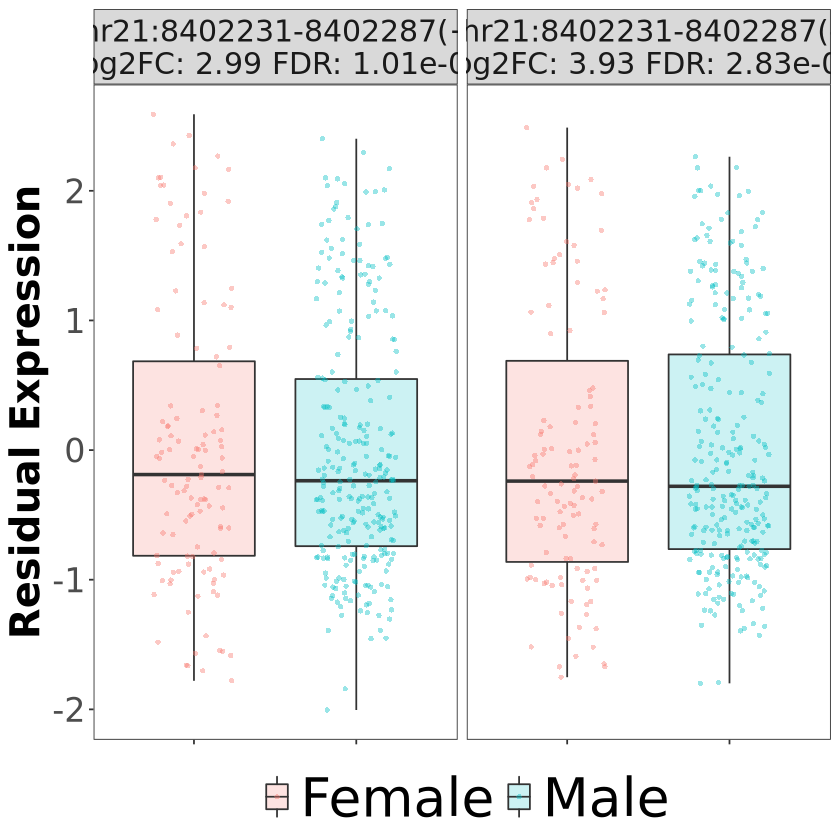

In [12]:
pjd = position_jitterdodge(jitter.width=1.0)
pp = (ggplot(bigdf2, aes(x=Sex, y=res, fill=Sex)) + geom_boxplot(alpha=0.2, outlier.alpha=0) + 
      geom_jitter(position=pjd, stroke=0, alpha=0.4, aes(color=Sex)) + 
      labs(x='Diagnosis', y='Residual Expression') + facet_grid('~Sex_ID') +
      theme_bw() + theme(axis.text.x=element_blank(), axis.text.y=element_text(size=20), 
                         axis.title.y=element_text(size=24, face='bold'), axis.title.x=element_blank(),
                         strip.text.x=element_text(size=18), strip.text.y=element_blank(), 
                         legend.text=element_text(size=32), legend.title=element_blank(), 
                         legend.position="bottom", panel.grid=element_blank()))
pp

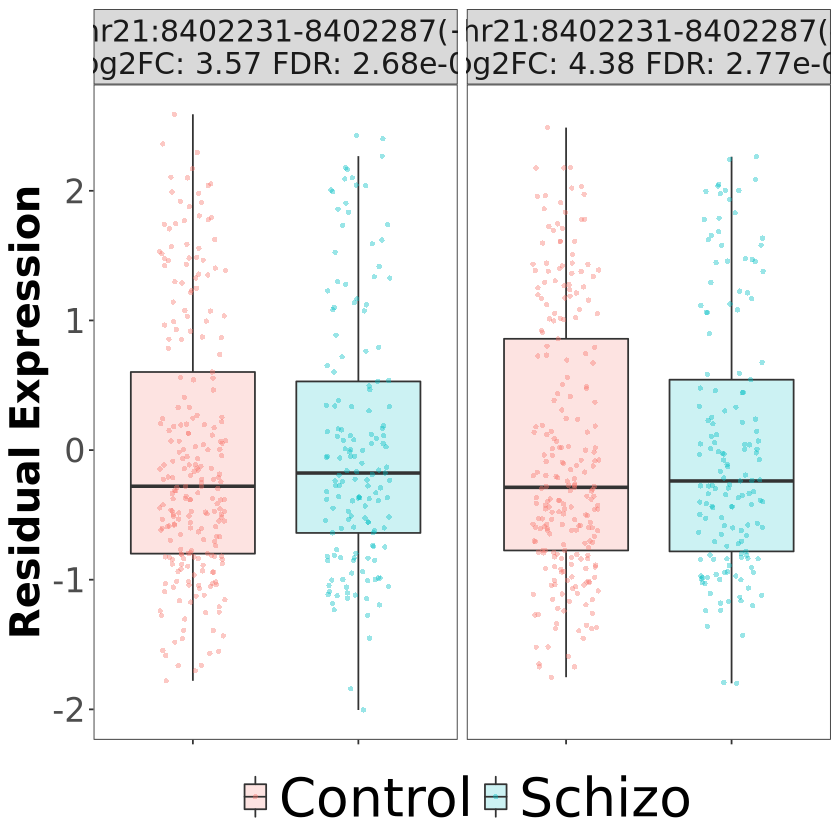

In [13]:
pjd = position_jitterdodge(jitter.width=1.0)
qq = (ggplot(bigdf2, aes(x=Dx, y=res, fill=Dx)) + geom_boxplot(alpha=0.2, outlier.alpha=0) + 
      geom_jitter(position=pjd, stroke=0, alpha=0.4, aes(color=Dx)) + 
      labs(x='Diagnosis', y='Residual Expression') + facet_grid('~SZ_ID') +
      theme_bw() + theme(axis.text.x=element_blank(), axis.text.y=element_text(size=20), 
                         axis.title.y=element_text(size=24, face='bold'), axis.title.x=element_blank(),
                         strip.text.x=element_text(size=18), strip.text.y=element_blank(), 
                         legend.text=element_text(size=32), legend.title=element_blank(), 
                         legend.position="bottom", panel.grid=element_blank()))
qq

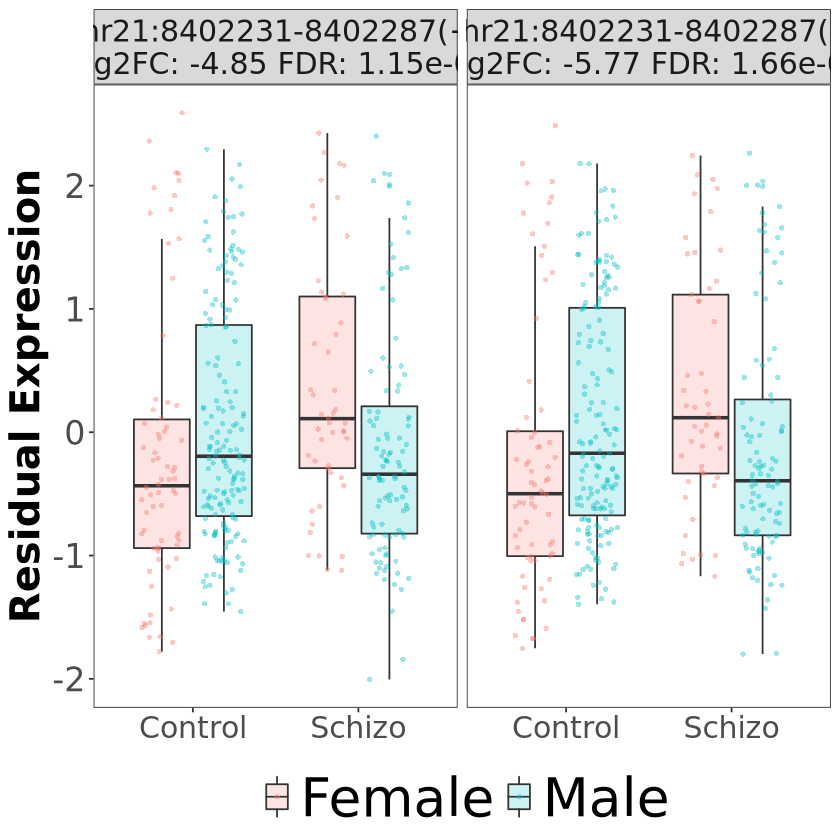

In [14]:
pjd = position_jitterdodge(jitter.width=0.5)
ww = (ggplot(bigdf2, aes(x=Dx, y=res, fill=Sex)) + geom_boxplot(alpha=0.2, outlier.alpha=0) + 
      geom_jitter(position=pjd, stroke=0, alpha=0.4, aes(color=Sex)) + 
      labs(x='Diagnosis', y='Residual Expression') + facet_grid('~New_ID') +
      theme_bw() + theme(axis.text.x=element_text(size=18), axis.text.y=element_text(size=20), 
                         axis.title.y=element_text(size=24, face='bold'), axis.title.x=element_blank(),
                         strip.text.x=element_text(size=18), strip.text.y=element_blank(), 
                         legend.text=element_text(size=32),legend.title=element_blank(),
                         legend.position='bottom',
                         panel.grid=element_blank()))
ww

In [15]:
ggplot_save(pp, 'junc_maleVfemale', 12, 9)
ggplot_save(qq, 'junc_szVctl', 12, 9)
ggplot_save(ww, 'junc_interaction', 12, 9)

## Session Info

In [16]:
Sys.time()
proc.time()
options(width = 120)
sessioninfo::session_info()

[1] "2020-03-02 22:12:40 EST"

   user  system elapsed 
 29.662   2.041  25.527 

─ Session info ───────────────────────────────────────────────────────────────────────────────────────────────────────
 setting  value                       
 version  R version 3.6.2 (2019-12-12)
 os       Arch Linux                  
 system   x86_64, linux-gnu           
 ui       X11                         
 language (EN)                        
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       America/New_York            
 date     2020-03-02                  

─ Packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────
 package     * version date       lib source        
 assertthat    0.2.1   2019-03-21 [1] CRAN (R 3.6.1)
 base64enc     0.1-3   2015-07-28 [1] CRAN (R 3.6.1)
 cli           2.0.1   2020-01-08 [1] CRAN (R 3.6.2)
 colorspace    1.4-1   2019-03-18 [1] CRAN (R 3.6.1)
 crayon        1.3.4   2017-09-16 [1] CRAN (R 3.6.1)
 data.table  * 1.12.8  2019-12-09 [1] CRAN (R 3.6.2)
